In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10864\1382025039.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#load the dataset
dataset = pd.read_csv('crop_recommendation.csv')

In [3]:
dataset.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
dataset.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
import pandas as pd


# Find unique values in each column
unique_values = dataset.apply(lambda x: x.unique())

# Find null values in each column
null_values = dataset.isna().sum()

# Display unique values and null values
print("Unique Values in Each Column:")
print(unique_values)

print("\nNull Values in Each Column:")
print(null_values)


Unique Values in Each Column:
N              [90, 85, 60, 74, 78, 69, 94, 89, 68, 91, 93, 7...
P              [42, 58, 55, 35, 37, 53, 54, 46, 56, 50, 48, 3...
K              [43, 41, 44, 40, 42, 38, 36, 37, 39, 35, 45, 1...
temperature    [20.87974371, 21.77046169, 23.00445915, 26.491...
humidity       [82.00274423, 80.31964408, 82.3207629, 80.1583...
ph             [6.502985292000001, 7.038096361, 7.840207144, ...
rainfall       [202.9355362, 226.6555374, 263.9642476, 242.86...
label          [rice, maize, chickpea, kidneybeans, pigeonpea...
dtype: object

Null Values in Each Column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


# Data Visualization

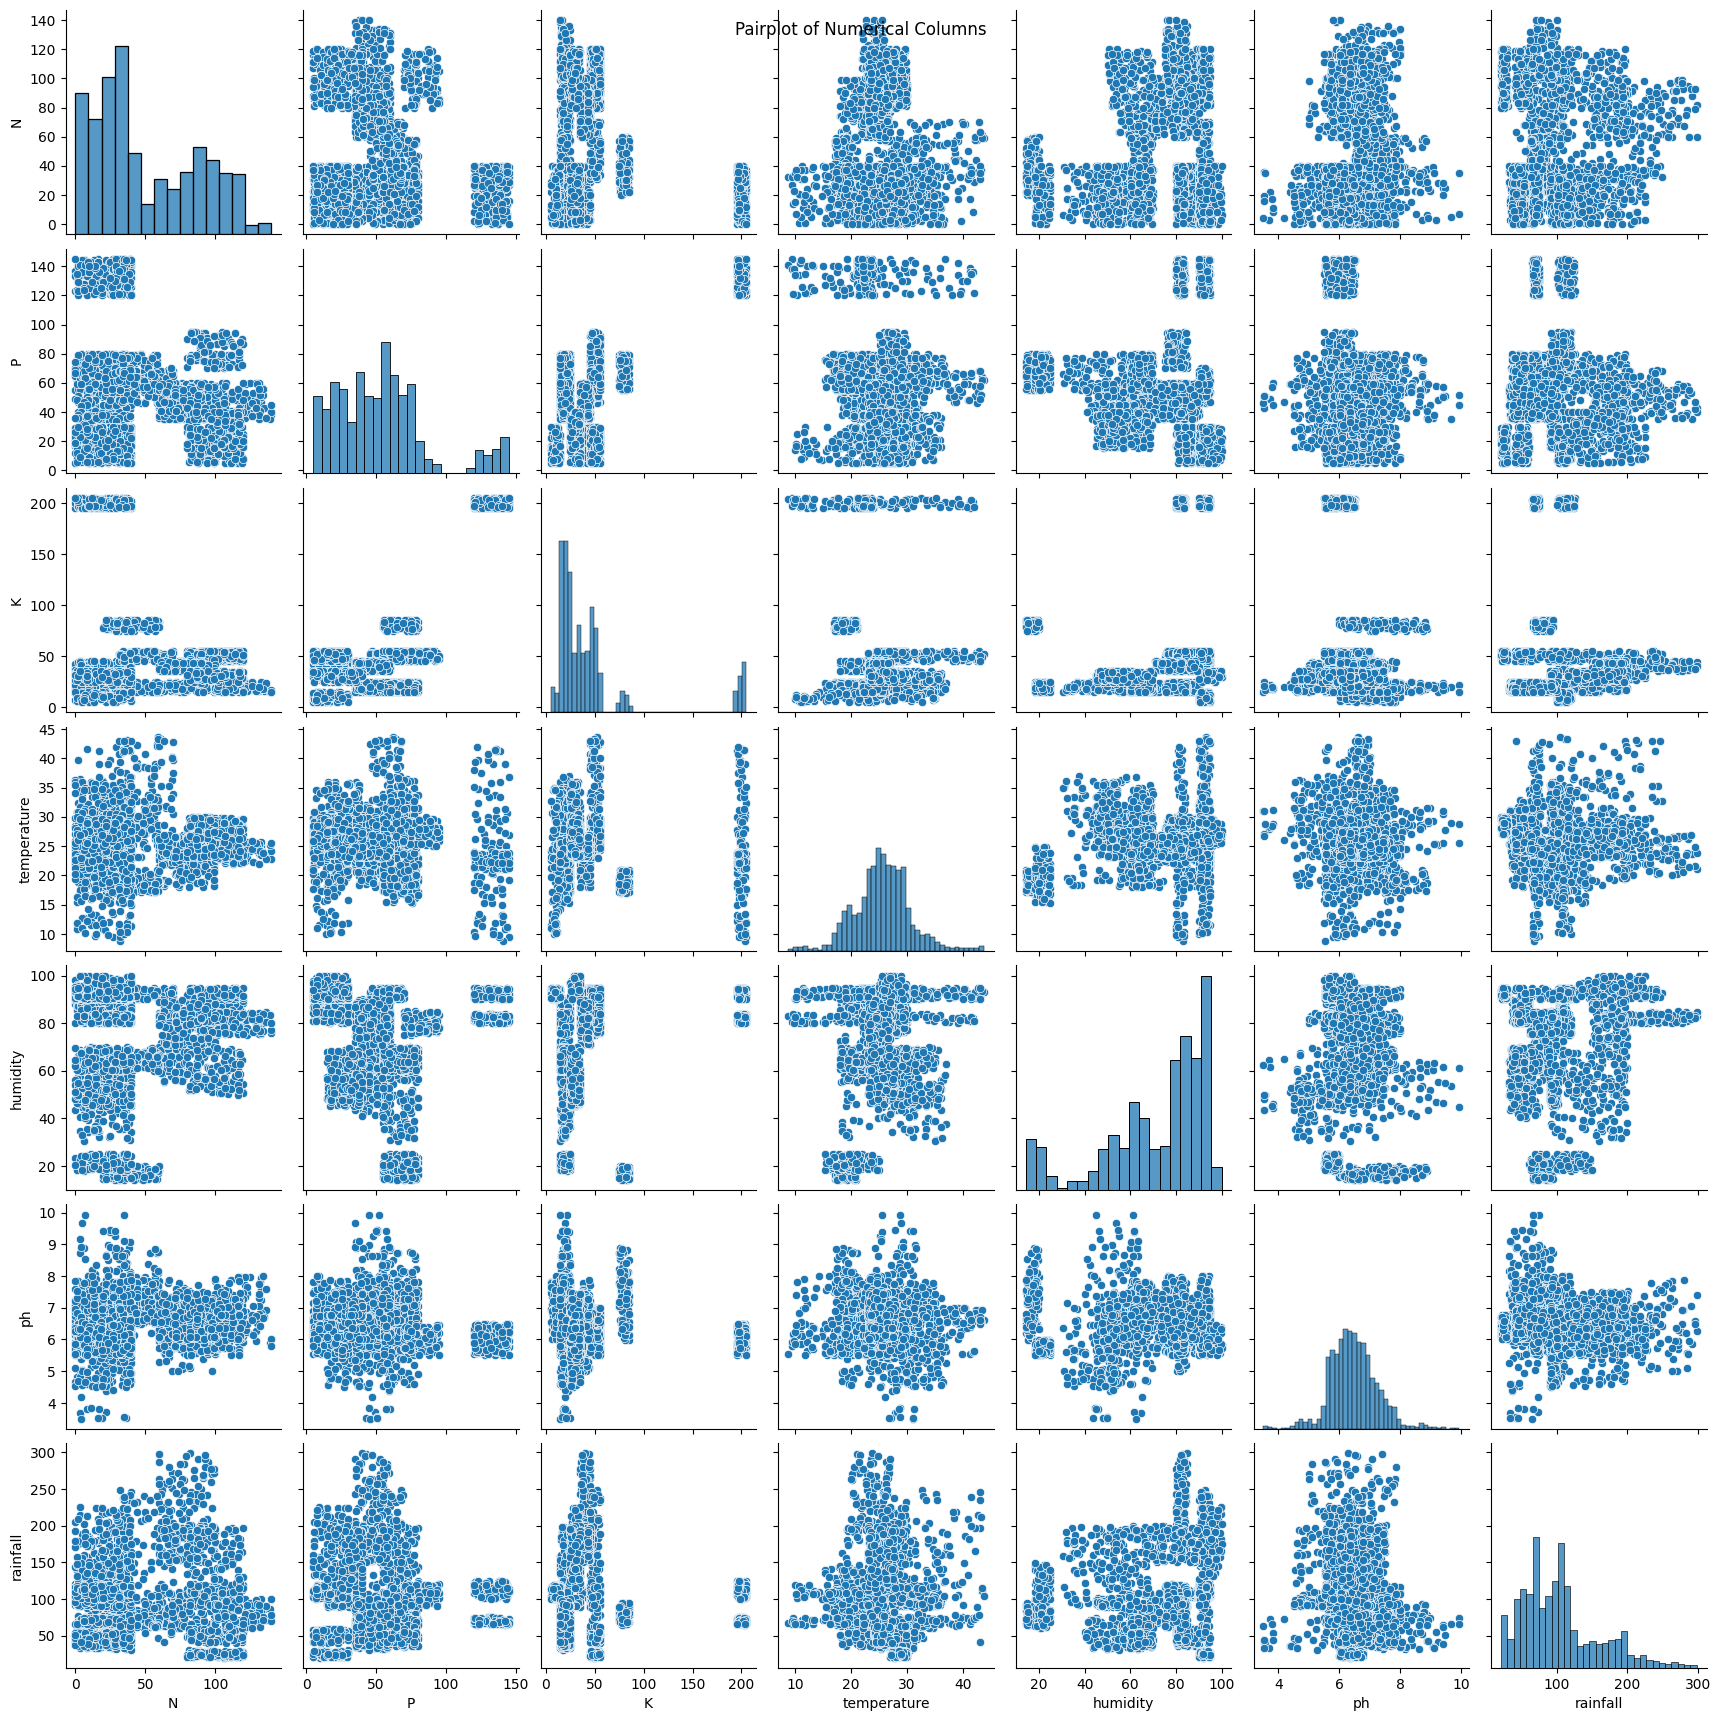

In [7]:
#Pairplot for numerical columns
sns.pairplot(dataset[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']])
plt.suptitle('Pairplot of Numerical Columns')
plt.show()

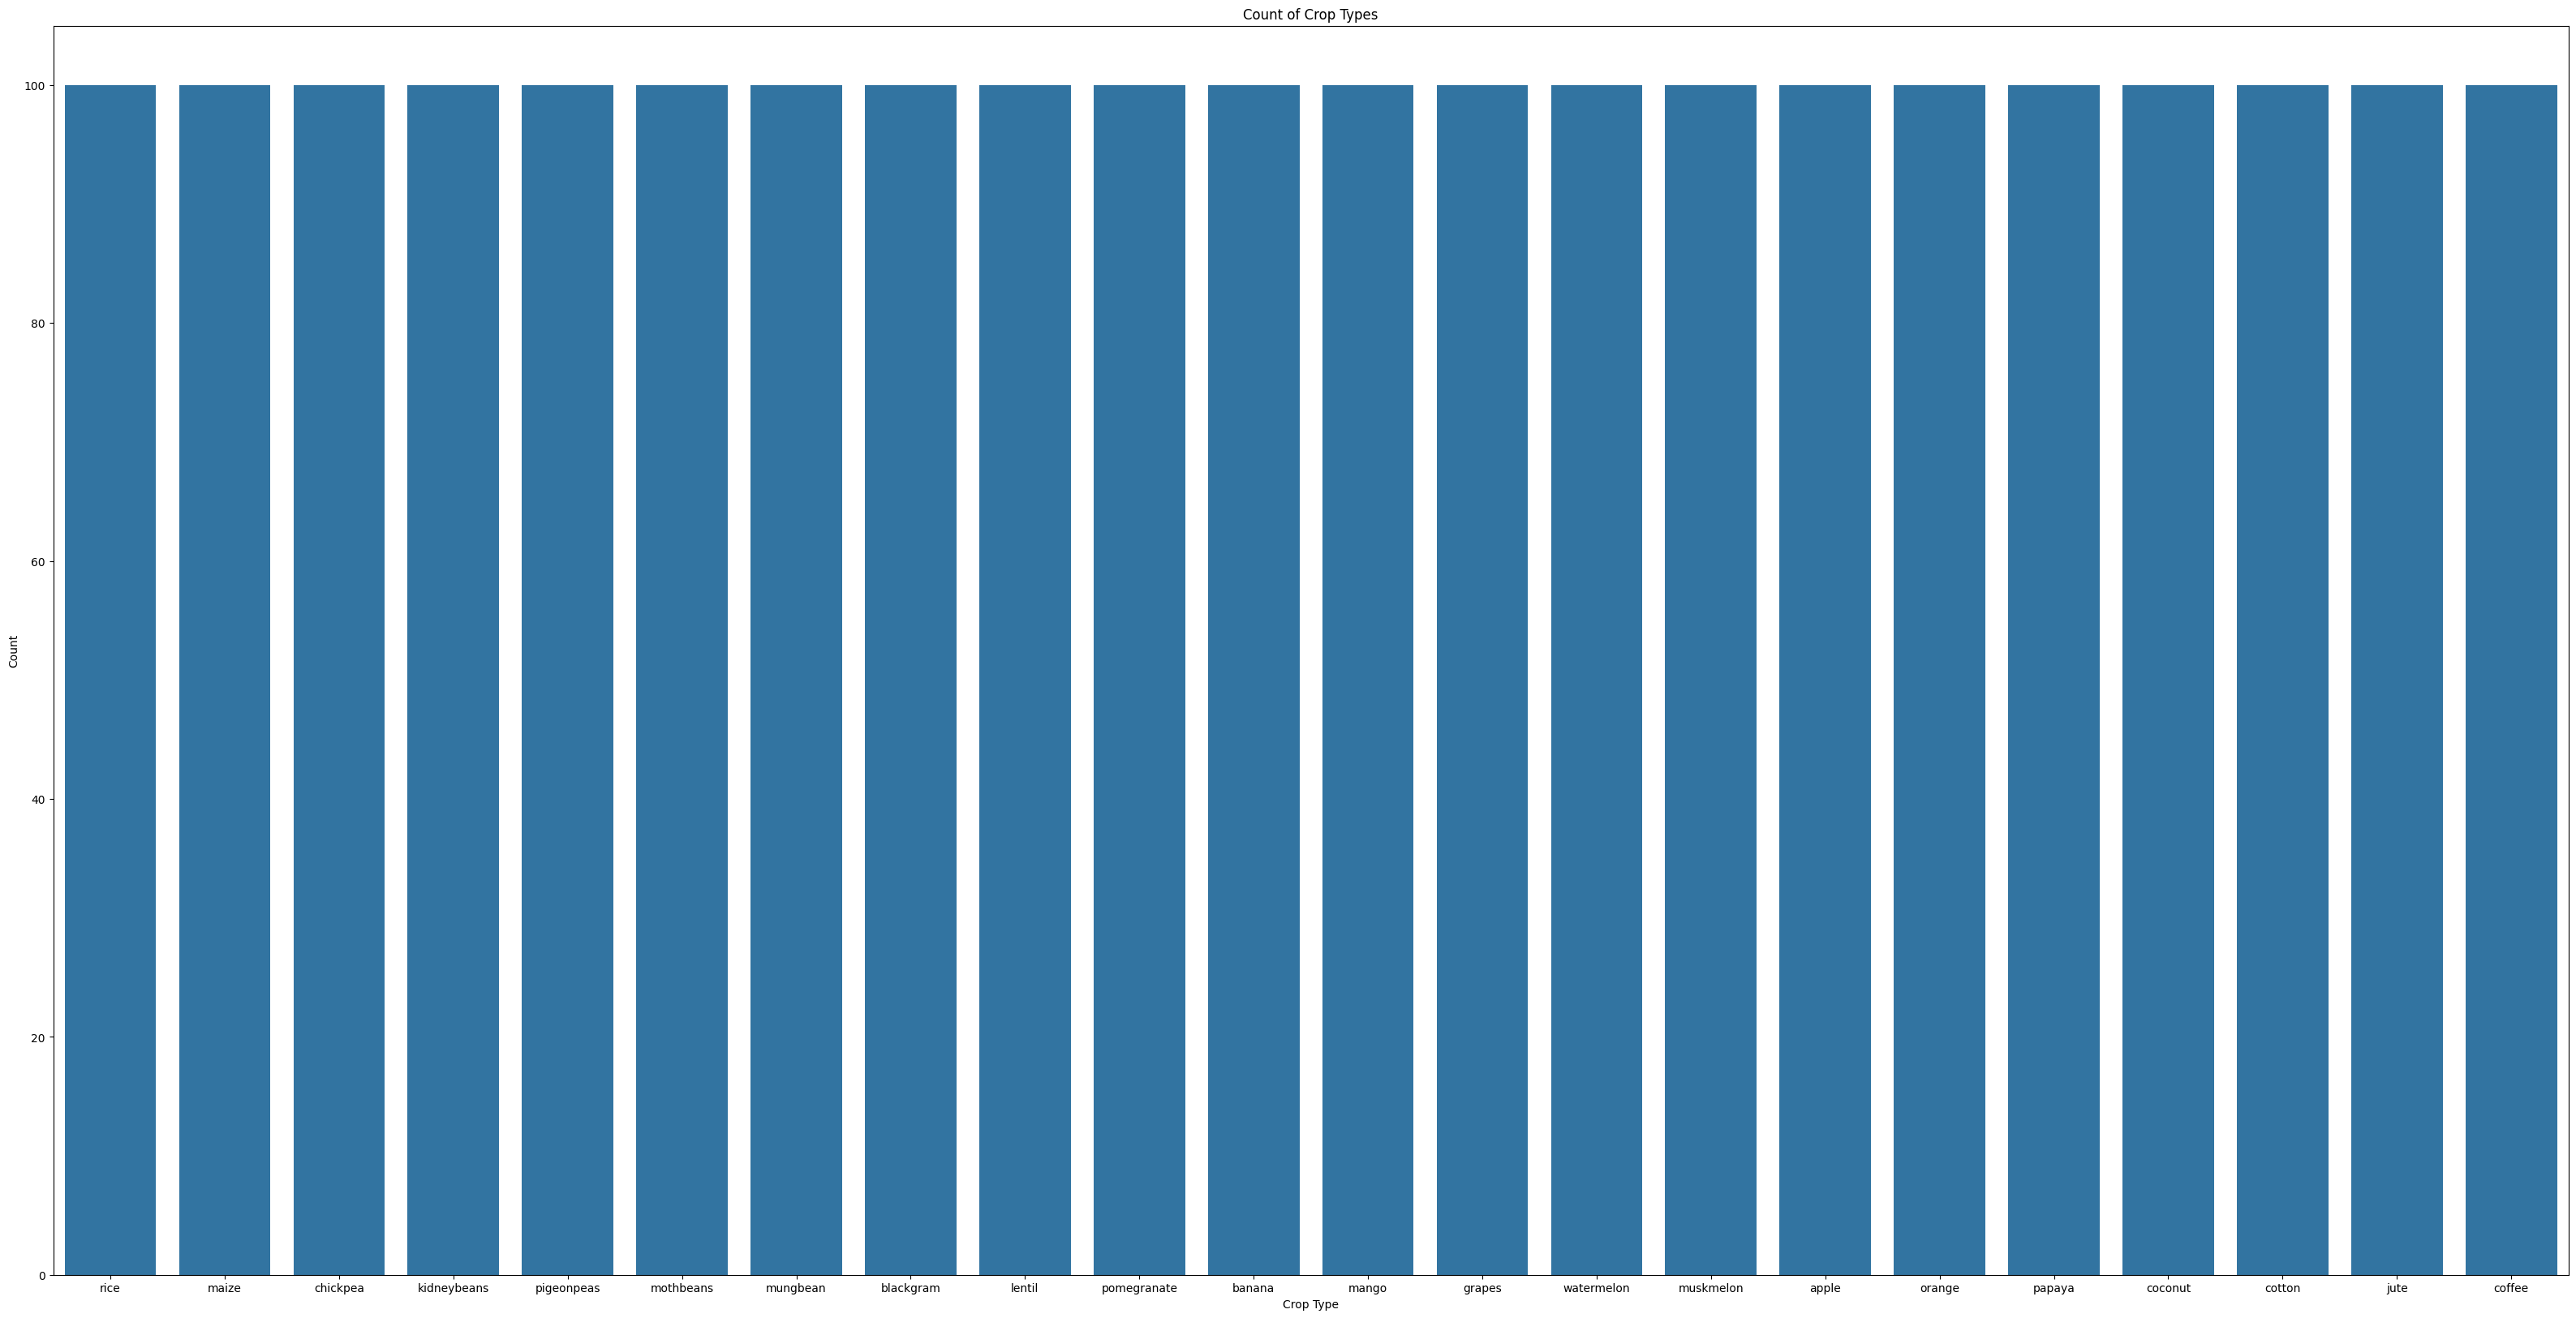

In [8]:
#Countplot for categorical variables
plt.figure(figsize=(40, 20))
sns.countplot(x='label', data=dataset)
plt.title('Count of Crop Types')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

# label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [11]:
# Select categorical columns for label encoding
categorical_columns = ['label']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    dataset[col] = label_encoder.fit_transform(dataset[col])
    
        
    # Print the mapping of original values to numerical labels
    print(f"Column: {col}")
    print("Original Value -> Encoded Label:")
    for original_value, encoded_label in zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)):
        print(f"{original_value} -> {encoded_label}")
    print()


    


Column: label
Original Value -> Encoded Label:
apple -> 0
banana -> 1
blackgram -> 2
chickpea -> 3
coconut -> 4
coffee -> 5
cotton -> 6
grapes -> 7
jute -> 8
kidneybeans -> 9
lentil -> 10
maize -> 11
mango -> 12
mothbeans -> 13
mungbean -> 14
muskmelon -> 15
orange -> 16
papaya -> 17
pigeonpeas -> 18
pomegranate -> 19
rice -> 20
watermelon -> 21



In [12]:
# Display the encoded dataset
print(dataset.head())

    N   P   K  temperature   humidity        ph    rainfall  label
0  90  42  43    20.879744  82.002744  6.502985  202.935536     20
1  85  58  41    21.770462  80.319644  7.038096  226.655537     20
2  60  55  44    23.004459  82.320763  7.840207  263.964248     20
3  74  35  40    26.491096  80.158363  6.980401  242.864034     20
4  78  42  42    20.130175  81.604873  7.628473  262.717340     20


# Splitage of Data

In [13]:
import pandas as pd


# Assuming the target variable is 'Fertilizer Name'
# Extract features (X) by dropping the target column
X = dataset.drop(columns=['label'])

# Extract target variable (y)
y = dataset['label']

# Print the shapes of X and y to verify
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (2200, 7)
Shape of y: (2200,)


# Model Building

# XG BOOSTING algorithm

Accuracy: 98.63636363636363 %
Precision: 98.69011544011543 %
Recall: 98.63636363636363 %
F1 Score: 98.6347164805032 %
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.96      0.96      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       0.95      1.00      0.97        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00     

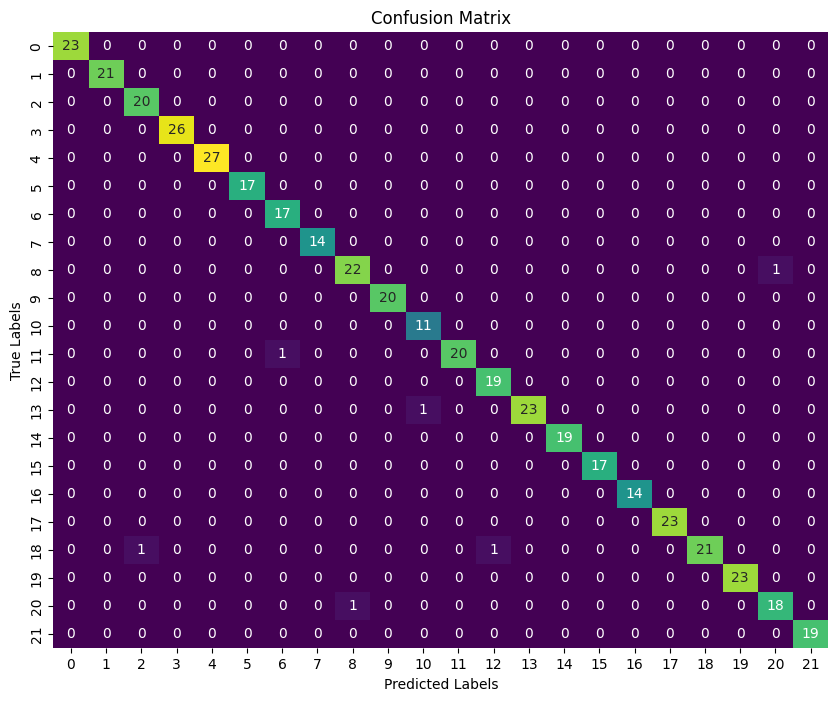

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Classifier
xgb_classifier = XGBClassifier()

# Train the model
xgb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_classifier.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100,'%')

# Calculate and print precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)
print("Precision:", precision*100,'%')
print("Recall:", recall*100,'%')
print("F1 Score:", f1*100,'%')

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))



# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix with a different colormap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [15]:
import pickle

pickle.dump(xgb_classifier, open('crop_xg.pkl', 'wb'))
